UNDERSTANDING GRADIENT DESCENT
So far, we have learned
• What a linear regression model is.using the equation of a line.
• How it is represented .
• What the parameters of the line are and how to find them for the best fit line in case of just one input variable.

Gradient descent is an optimization algorithm that works iteratively and aims to find the minimum of convex function with respect to a set of parameters

Step 1- Random initialisation- slope m and intercept c can always be initialized to small random value but initializing it to mean regression model is always better, m= 0.1 and c=mean of sale price
Step 2-Generating predictions- Y hat(Y^)=mx+c 
Step 3-Calculating cost of predictions-n
τ=Σ i=1->n [(Yi^-Y)^2/n] =Σ i=1->n [(mXi^+c-Y)^2/n],which means cost function depends upon m and c, using mean squared error as our cost function
Step 4-Updating parameters,
Mnew=Mold-Zm,
Cnew=Cold-Zc
How to find the value of z, how do we know on which side of curve the prediction is and what is the value of z that needs to be taken
Value of z can be found with the help of partial differenciation-Ə(τ)/Əm
The sign of the slope of the slope will always be the same as that of the desired value of Zm
Partial derivatives of the cost function with respect to m and C-
Gm(gradient of cost function wrt to m)=Ə(τ)/Əm=2 * Σ i=1->n [(mXi^+c-Yi)* Xi/n]
Gc=Ə(τ)/Əc=2 * Σ i=1->n [(mXi^+c-Yi)/n]
Zm = alpha*Gm,Zc = alpha*Gc
Mnew=Mold- alpha*Gm,
Cnew=Cold- alpha*Gc
alpha is the learning rate constant acts as moderator to update the parameters,controls how big the change between old and new value should be so that we reach to the minimum value gradually.
When alpha is significantly high, the cost function may explode and bounce out far from the minima,if its low it will take lot of iterations to converge to the optimal value, alpha here=0.01

step 2 again
Previous value of the cost function _New value of the cost function < The threshold value (usually in terms of 10^-x)
Then we say the algorithm is converged and then we can stop it



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [36]:
data=pd.read_csv('Transformed_Housing_Data2.csv')

In [37]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price':sale_price,'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


In [38]:
def param_init(Y):
    '''
    Y=target variable 
    returns initialized value of m and c
    '''
    m=0.1
    c=Y.mean()
    return m, c

In [39]:
def generate_predictions(m,c,X):
    '''
    X= independent variable
    returns prediction generated by line
    '''
    prediction=[]
    for x in X:
        pred=m*x+c
        prediction.append(pred)
    return prediction

In [40]:
def compute_cost(prediction,Y):
    '''
    returns the mean_squared_error between prediction and Y
    '''
    cost=np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [41]:
'''
step 4 calculating the gradients and updating the patameters
'''
def gradients(prediction ,Y,X):
    '''
    returns gradient corresponding to m and c
    '''
    n=len(Y)
    Gm = 2/n*np.sum((prediction-Y)*X)
    Gc = 2/n*np.sum((prediction-Y))
    return Gm ,Gc

In [42]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    '''
    update and return new values of m and c
    '''
    m_new=m_old-alpha*Gm_old
    c_new=c_old-alpha*Gc_old
    return m_new,c_new

In [43]:
def result(m,c,X,Y,cost,predictions,i):
    '''
    print and plot the final result obtained from gradient descent
    '''
    #if gradient descent converged to the optimum value before max_iter
    if i <max_iter - 1 :
        print("****** Gradient Descent has converged at iteration {} *****".format(i))
    else:
        print("***** Result after", max_iter, 'iterations is: *****')
              
              
    # plotting the final result
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter (X, Y, color = 'red', label = 'data points')
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

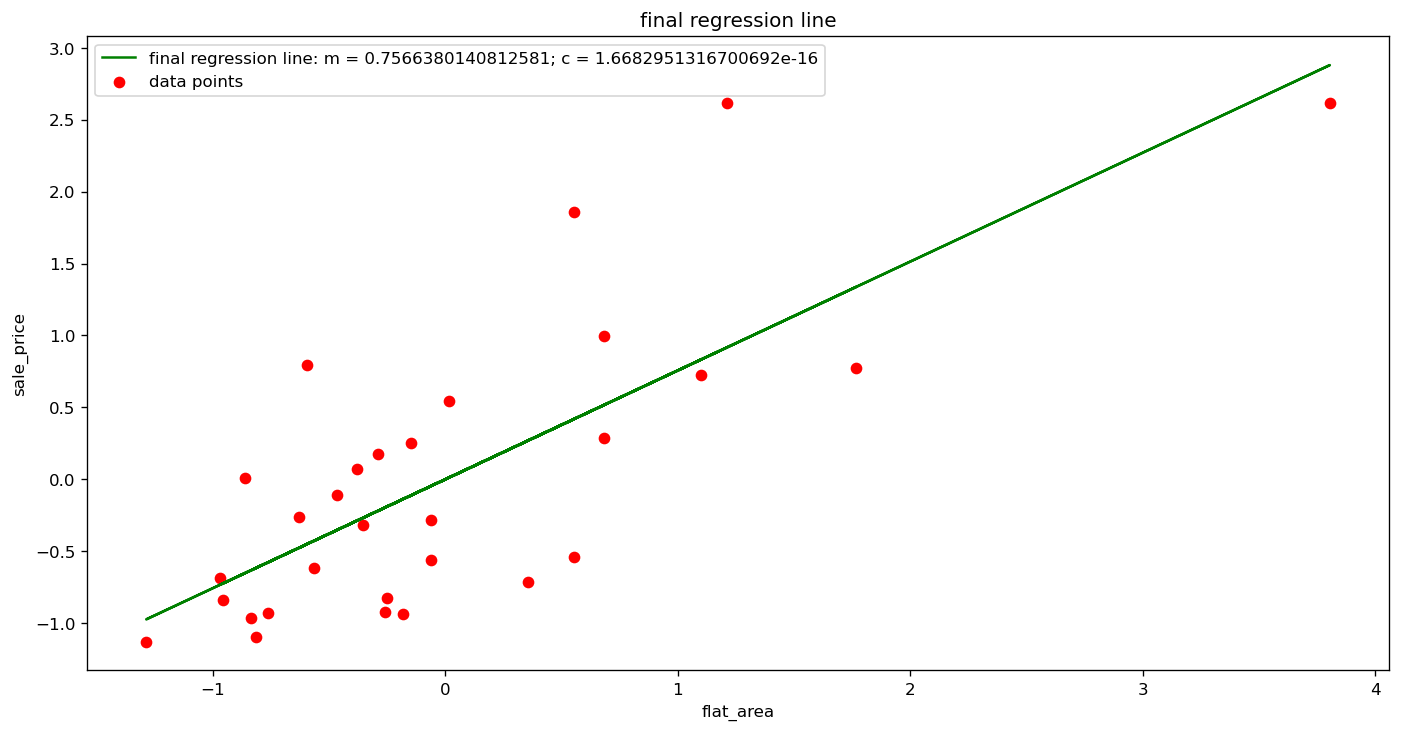

In [46]:
#defining and reshaping dataset
sale_price= sample_data['sale_price'].values.reshape(-1,1)
flat_area= sample_data['flat_area'].values.reshape(-1,1)

#scaling data-due to large magnitude of data ,predictions explode in large magnitude
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price=scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area=scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

##declaring parameters
max_iter=1000
cost_old=0
alpha=0.01

#step1=init the values of m and c
m,c=param_init(sale_price)

##gradient descent in action 
for i in range(0,max_iter):
    ##step 2 generating predictions
    predictions=generate_predictions(m,c,flat_area)
    ##step 3 calculating cost
    cost_new=compute_cost(predictions,sale_price)
    ## checking if GD converged
    if(abs(cost_new-cost_old))<10**(-7):
        break
    #calculating gradients
    Gm,Gc=gradients(predictions,sale_price,flat_area)
    ##step 4 updating the parameters m and c
    m,c=param_update(m,c,Gm,Gc,alpha)
    
    ##display result after every 20 iterations
    if (i%20==0):
        print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)
    
    ##updating cost_old
    cost_old=cost_new
    
##final results
result(m,c,flat_area,sale_price,cost_new,predictions,i)

In [ ]:
'''
The purpose of finding the derivative in gradient descent is to calculate slope of the cost function, which allows us to  decide whether we want to increase or decrease the parameters'''